In [2]:
%load_ext autoreload
%autoreload 2

from scripts import helper_scripts as sga
from scripts import testing_utils as tu
from scripts.uGLAD import main as uG
from scripts.helper_scripts import process_table, get_partial_correlations, precision_empty, uGLAD_graph
from analytics_utils import get_partial_correlations_from_graph, set_node_attributes

In [3]:
import numpy as np
import pandas as pd

In [4]:
papers = pd.read_csv("/mnt/d/Work/data/Cora/cora/cora.content", sep='\t', header=None)
papers.shape

(2708, 1435)

In [5]:
columns = ['paperID']
for i in range(1, 1434):
	columns.append('w'+str(i))
columns.append('category')

In [6]:
papers.columns = columns

In [7]:
paper_cat = papers[['paperID', 'category']].copy(deep=True)
paper_cat.shape

(2708, 2)

In [8]:
paper_cat.category.value_counts()

Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: category, dtype: int64

In [9]:
cat_list = paper_cat.category.unique()
print(cat_list)

['Neural_Networks' 'Rule_Learning' 'Reinforcement_Learning'
 'Probabilistic_Methods' 'Theory' 'Genetic_Algorithms' 'Case_Based']


In [10]:
cites = pd.read_csv("/mnt/d/Work/data/Cora/cora/cora.cites", sep='\t', header=None)
cites.shape

(5429, 2)

In [11]:
del papers['category']
paper_words = papers.set_index('paperID').transpose(copy=True)

In [12]:
columns = paper_words.columns
paper_words[columns[300:600]].head()

paperID,1022969,143801,612306,417017,396412,1107455,91975,180187,27203,1152508,...,1104809,4804,648112,33301,33303,267824,1138970,13717,1131719,1120866
w1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
w2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
w3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
w4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
w5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
paper_words.shape

(1433, 2708)

In [14]:
paper_words.head()

paperID,31336,1061127,1106406,13195,37879,1126012,1107140,1102850,31349,1106418,...,626531,1131180,1130454,1131184,1128974,1128975,1128977,1128978,117328,24043
w1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
w2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
w3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
w4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
w5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# Create a uGLAD graph

In [18]:
table = process_table(paper_words[columns[300:600]], NORM='min_max', COND_NUM=np.inf, eigval_th=1e-3, msg='')  # np.inf
table.shape
table.head()

: Processing the input table for basic compatibility check
: The input table has sample 1433 and features 300
: Total zero samples dropped 354
: Single value columns dropped: total 0, columns []
Input covariance matrix: The condition number 1287.7546942007593 and min eig 0.00023361646588199425 max eig 0.30084070058212964
: Duplicates dropped: total 0, columns []
: Low Variance columns dropped: min variance 0.0,    total 0, columns []
Processed covariance matrix: The condition number 1287.7546942007593 and min eig 0.00023361646588199425 max eig 0.30084070058212964
: The processed table has sample 1079 and features 300
: Total time to process the table 0.243 secs


paperID,1022969,143801,612306,417017,396412,1107455,91975,180187,27203,1152508,...,1104809,4804,648112,33301,33303,267824,1138970,13717,1131719,1120866
w2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
w7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
EPOCHS = 2000

model = uG.uGLAD_GL()  

# Fit to the data
model.fit(
    	table,
    	centered=False,
		epochs=EPOCHS,
	    lr=0.001, # decrease if you get NaNs
	    INIT_DIAG=0,
    	L=15, #5
	    verbose=True,  # True if in debug mode
    	k_fold=0,  # Direct mode
    	mode='direct'  # Modes = direct/cv/missing
    )  

print(f'Final loss value {model.final_loss, np.isnan(model.final_loss)}')
print(f'precision matrix: {model.precision_}')

Running uGLAD
Direct Mode
epoch:0/2000 loss:-324.8056945800781
epoch:200/2000 loss:-562.3385620117188
epoch:400/2000 loss:-683.134521484375
epoch:600/2000 loss:-952.8717651367188
epoch:800/2000 loss:-892.8773193359375
epoch:1000/2000 loss:-896.0397338867188
epoch:1200/2000 loss:-899.5989990234375
epoch:1400/2000 loss:-918.5681762695312
epoch:1600/2000 loss:-936.5875244140625
epoch:1800/2000 loss:-954.1612548828125
Total runtime: 518.2050223350525 secs

Final loss value (array(-972.91205, dtype=float32), False)
precision matrix: [[39.615986   -0.6311874  -0.38545492 ...  0.22903535 -0.16995212
   0.2589028 ]
 [-0.63118774 61.22588    -0.6390701  ...  0.20063177  0.23835938
  -0.31828249]
 [-0.38545522 -0.6390705  41.657578   ... -0.         -2.1761374
   0.17443039]
 ...
 [ 0.22903526  0.2006315  -0.         ... 44.38276    -1.4547507
  -0.        ]
 [-0.169952    0.2383595  -2.1761346  ... -1.4547505  42.67318
  -0.        ]
 [ 0.25890297 -0.31828249  0.17443006 ... -0.         -0.
  4

In [34]:
if np.isnan(model.final_loss):
    print(f'Model did not converge, loss is {model.final_loss}')
elif precision_empty(model.precision_):
    print("LEARNED PRECISION MATRIX INDICATES NO CORRELATIONS.\n\n")

DA: number of nonzero entries in upper triangular precision matrix is 34556


In [35]:
SPARSITY = 1
CORRELATION_TYPE = "both"
DESCRIPTION = "Paper word content graph"

partial_correlations = get_partial_correlations(model.precision_)

G, G_image_bytes, G_graph_edge_list = uGLAD_graph(
                    table,
                    partial_correlations, 
                    SPARSITY, 
                    CORRELATION_TYPE,
                    title=DESCRIPTION,
                    fig_size=20,
                    save_file='cora_correlation_graph.png',
                    #plot_edge_labels=False
                )

Number of nonzero entries in upper triangular precision matrix is 34556
Sparsity 1 using threshold 0.0
We have 34556 edges


# To avoid having to run uGLAD each time

In [36]:
import pickle

with open("cora_graph.pkl", 'wb') as fh:
	pickle.dump(G, fh)

with open("cora_edges.pkl", 'wb') as fh:
	pickle.dump(G_graph_edge_list, fh)

In [17]:
import pickle

fh = open("cora_graph.pkl", "rb")
G = pickle.load(fh)
fh = open("cora_edges.pkl", "rb")
G_graph_edge_list = pickle.load(fh)


# Cheking the number and weight of edges within and between categories

In [20]:
edge_counts = {}
edge_weights = {}
for cat in cat_list:
	edge_counts[cat] = {}
	edge_weights[cat] = {}
	for c2 in cat_list:
		edge_counts[cat][c2] = 0
		edge_weights[cat][c2] = 0

for e in G_graph_edge_list:
	endfirst = e.find(',')
	endsecond = e.find(',', endfirst+1)
	endthird = e.find(',', endsecond+1)
	n1 = int(e[1:endfirst])
	n2 = int(e[endfirst+2:endsecond])
	w = e[endsecond+2:endthird]
	c = e[endthird+2:e.find(')')]
	cat1 = paper_cat.loc[paper_cat['paperID']==n1, 'category'].iloc[0]
	cat2 = paper_cat.loc[paper_cat['paperID']==n2, 'category'].iloc[0]
	edge_counts[cat1][cat2] +=1
	edge_weights[cat1][cat2] += float(w)

for cat in cat_list:
	for c2 in cat_list:
		print(cat, c2, edge_counts[cat][c2], edge_weights[cat][c2])

Neural_Networks Neural_Networks 3885 20.731999999999932
Neural_Networks Rule_Learning 695 0.7340000000000002
Neural_Networks Reinforcement_Learning 2099 4.494000000000017
Neural_Networks Probabilistic_Methods 1730 5.608000000000007
Neural_Networks Theory 1864 5.338000000000005
Neural_Networks Genetic_Algorithms 669 1.978000000000004
Neural_Networks Case_Based 1383 2.59400000000001
Rule_Learning Neural_Networks 881 1.592000000000005
Rule_Learning Rule_Learning 159 2.521
Rule_Learning Reinforcement_Learning 464 1.108
Rule_Learning Probabilistic_Methods 389 0.72
Rule_Learning Theory 444 1.3960000000000008
Rule_Learning Genetic_Algorithms 156 0.12299999999999983
Rule_Learning Case_Based 322 1.2480000000000018
Reinforcement_Learning Neural_Networks 1279 3.1530000000000067
Reinforcement_Learning Rule_Learning 223 0.8230000000000003
Reinforcement_Learning Reinforcement_Learning 741 9.814000000000002
Reinforcement_Learning Probabilistic_Methods 561 0.8080000000000004
Reinforcement_Learning The

# Accuracy tests

We have 300 known attributes out of 300 nodes
Known values belong to the following 7 classes: {'Probabilistic_Methods', 'Genetic_Algorithms', 'Case_Based', 'Reinforcement_Learning', 'Rule_Learning', 'Neural_Networks', 'Theory'}
We will be testing the following masked settings: range(1, 226)
norm KL max_iter 20
Running the iterative method


/mnt/d/Work/RC/RC.Taurus.Code/DigesterAnalytics/sparse_graph_analytics/analytics_utils.py:203: RuntimeWarning: invalid value encountered in multiply
  nu[i,:] += rel_entr(np.array(nu0)[i,:], nu_neg[i,:]) * nu_neg[i,:]
/mnt/d/Work/RC/RC.Taurus.Code/DigesterAnalytics/sparse_graph_analytics/analytics_utils.py:203: RuntimeWarning: invalid value encountered in multiply
  nu[i,:] += rel_entr(np.array(nu0)[i,:], nu_neg[i,:]) * nu_neg[i,:]
/mnt/d/Work/RC/RC.Taurus.Code/DigesterAnalytics/sparse_graph_analytics/analytics_utils.py:203: RuntimeWarning: invalid value encountered in multiply
  nu[i,:] += rel_entr(np.array(nu0)[i,:], nu_neg[i,:]) * nu_neg[i,:]
/mnt/d/Work/RC/RC.Taurus.Code/DigesterAnalytics/sparse_graph_analytics/analytics_utils.py:203: RuntimeWarning: invalid value encountered in multiply
  nu[i,:] += rel_entr(np.array(nu0)[i,:], nu_neg[i,:]) * nu_neg[i,:]
/mnt/d/Work/RC/RC.Taurus.Code/DigesterAnalytics/sparse_graph_analytics/analytics_utils.py:203: RuntimeWarning: invalid value enc

Accuracy at 50: 0.6632000000000001 accuracy at 100: 0.6344000000000001 accuracy at 150 0.6151999999999999


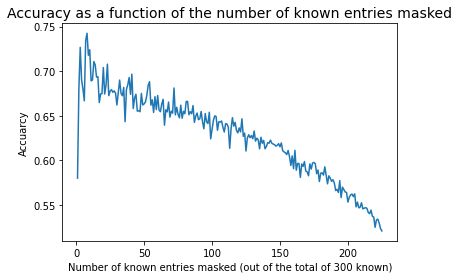

In [22]:
# Get the precision matrix from the recovered sparse graph
theta = get_partial_correlations_from_graph(G)

# creating the node attribute dictionary
unknown_cat = 'not available'

node_attribute_dict = {n:unknown_cat for n in G.nodes()}

# setting the known classes
node_attribute_known = {}
attribute_values = {}
for n in G.nodes:
    attr = paper_cat[paper_cat['paperID']==n].category.iloc[0]
    node_attribute_known[n] = attr
    if attr in attribute_values:
        attribute_values[attr] += 1
    else:
        attribute_values[attr] = 1

node_attribute_dict = set_node_attributes(node_attribute_dict, node_attribute_known)
#for a in attribute_values:
#    print(a, attribute_values[a], round(attribute_values[a]/float(len(G.nodes)), 2))
# print(f'Initial node attributes {node_attribute_dict}\n')
num_classes = len(set(node_attribute_dict.values()))
test_num = 50
method = 'iterative'     # 'analytical'  #'iterative'  #'neighbor_vote' 
norm = "KL"  #None  #'KL', 'Wasserstein']:
a = 1
conv_method = "posneg"  # "pos", "exp"

known_att, known_pos = tu.number_known(node_attribute_dict, unknown_cat)
print(f'We have {known_att} known attributes out of {len(G.nodes)} nodes')
print(f'Known values belong to the following {len(set(node_attribute_dict.values()))} classes: {set(node_attribute_dict.values())}')
masked_counts = range (1, 3*int(known_att/4)+1)  #3*int(known_att/4)+1)
print(f'We will be testing the following masked settings: {masked_counts}')

results = []
# for a in [1]:  #[0.1, 0.3, 0.5, 0.8, 1, 2, 5, 10, 20, 30]:
for norm in ["KL"]:   #[None, "KL", "Wasserstein"]:
    results_norm = []
    for iter in [20]:  #, 30, 40, 50, 60, 70, 80, 90, 100]:
        print("norm", norm, "max_iter", iter)  
        accuracy = tu.run_tests(theta, method, node_attribute_dict, masked_counts, unknown_cat, test_num, alpha=a, conv_method=conv_method, norm=norm, max_iter=iter)  
        # accuracy, predDistr = tu.run_tests_confidence(theta, method, node_attribute_dict, masked_counts, unknown_cat, test_num, alpha=a, conv_method="pos", norm=None)
        # print(method, a, norm, conv_method, iter)
        print("Accuracy at 50:", accuracy[49], "accuracy at 100:", accuracy[99], "accuracy at 150", accuracy[149])
        # print(np.array(accuracy).mean(axis=1))
        tu.plot_accuracy_results(accuracy, known_att, masked_counts)   
        # tu.plot_accuracy_by_confidence_results(accuracy, known_att, masked_counts, num_classes)
        results_norm.append(accuracy)
    results.append(results_norm)


In [96]:
results

[[[0.62,
   0.57,
   0.54,
   0.61,
   0.54,
   0.5466666666666666,
   0.5942857142857142,
   0.5525,
   0.6244444444444445,
   0.608,
   0.6163636363636364,
   0.6116666666666667,
   0.6215384615384616,
   0.5871428571428572,
   0.5826666666666667,
   0.57,
   0.5964705882352942,
   0.5855555555555556,
   0.5810526315789474,
   0.613,
   0.6085714285714285,
   0.5963636363636364,
   0.6052173913043479,
   0.5783333333333333,
   0.6216000000000002,
   0.5746153846153845,
   0.5925925925925926,
   0.5900000000000001,
   0.5834482758620689,
   0.58,
   0.5896774193548386,
   0.574375,
   0.5878787878787879,
   0.5782352941176471,
   0.5605714285714286,
   0.5855555555555556,
   0.5529729729729729,
   0.5626315789473684,
   0.5743589743589744,
   0.576,
   0.5853658536585367,
   0.568095238095238,
   0.5665116279069768,
   0.5954545454545455,
   0.5653333333333334,
   0.5634782608695652,
   0.5782978723404255,
   0.59625,
   0.573469387755102,
   0.552,
   0.5592156862745099,
   0.5673076

# Checking the importance of max_iter

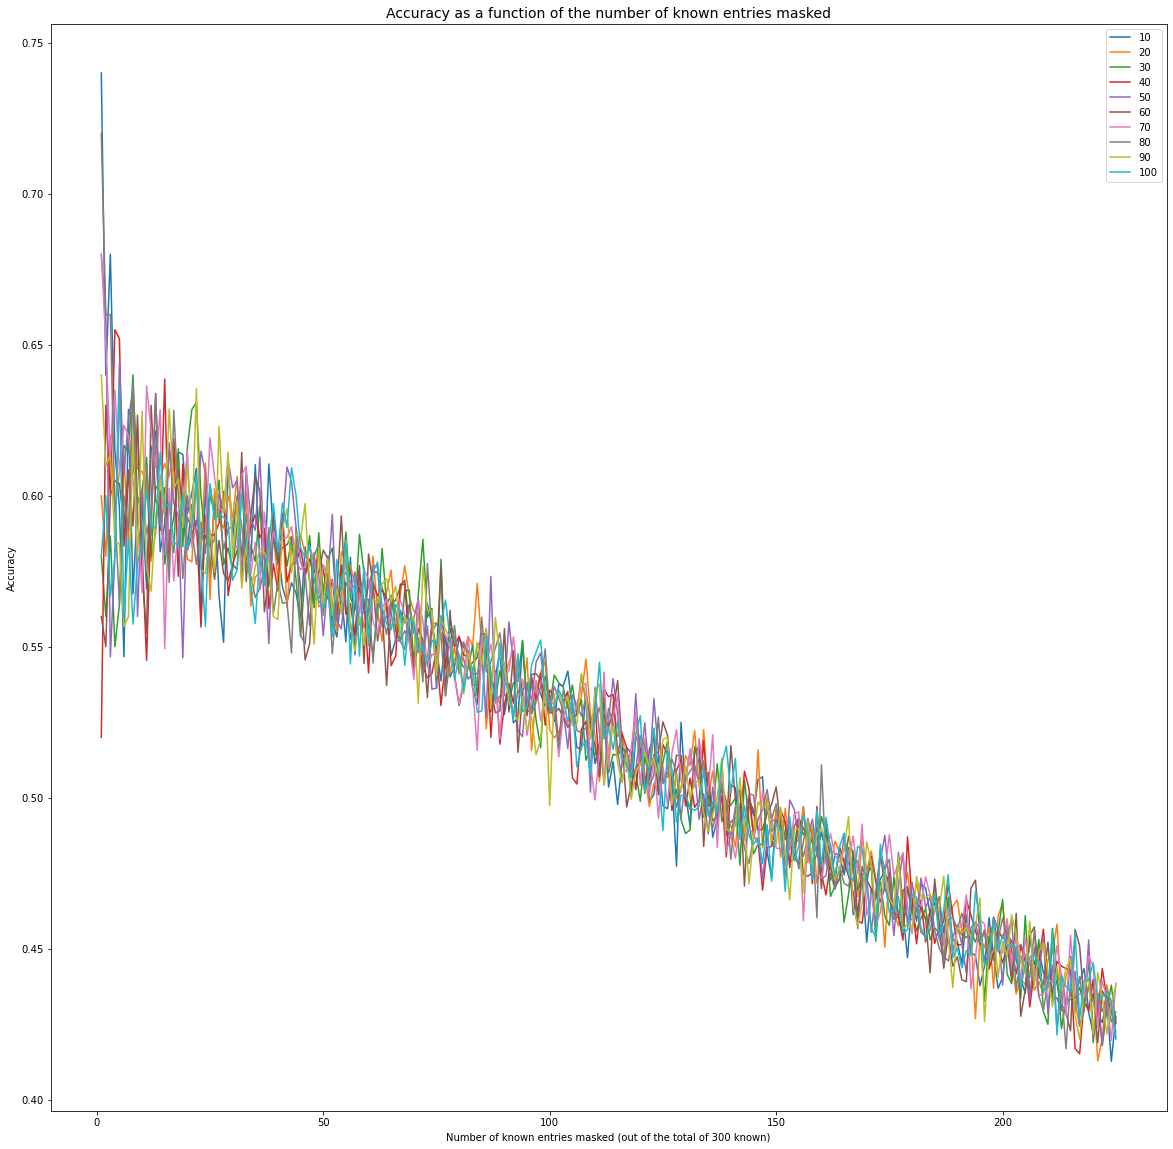

In [90]:
import matplotlib.pyplot as plt

norm = 1

plt.figure(figsize=(20, 20))
for i in range(len(results[norm])):
	plt.plot(masked_counts, np.array(results[norm][i]), label=(i+1)*10)	# color='blue', linewidth=3, linestyle='--'

plt.title('Accuracy as a function of the number of known entries masked', fontsize=14)
plt.xlabel(f'Number of known entries masked (out of the total of 300 known)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


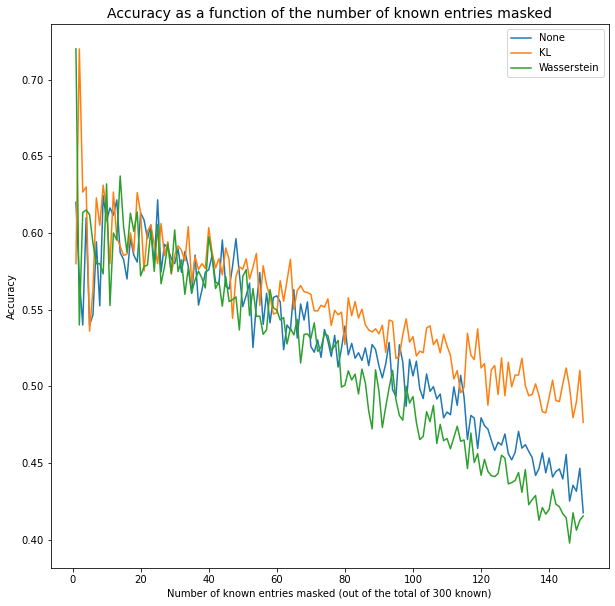

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(masked_counts, np.array(results[0][0]), label="None")	# color='blue', linewidth=3, linestyle='--'
plt.plot(masked_counts, np.array(results[1][0]), label="KL")	# color='blue', linewidth=3, linestyle='--'
plt.plot(masked_counts, np.array(results[2][0]), label="Wasserstein")	# color='blue', linewidth=3, linestyle='--'

plt.title('Accuracy as a function of the number of known entries masked', fontsize=14)
plt.xlabel(f'Number of known entries masked (out of the total of 300 known)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
